## Playing around with Bessel Function orthogonality

$$\int_0^\infty J_\alpha(r) J_\beta(r) \frac{dr}{r} = \frac{2}{\pi} \frac{\sin(\frac{\pi}{2}(\alpha-\beta))}{\alpha^2 - \beta^2} $$

If $\Delta = \alpha + \beta$ then:
$$ \frac{2}{\pi} \frac{\sin(\frac{\pi}{2}(\alpha-\beta))}{\alpha^2 - \beta^2} = \frac{2}{\pi} \frac{\sin(\frac{\pi}{2}\Delta)}{\Delta (\alpha + \beta)} = \frac{2}{\pi} \frac{\frac{\pi}{2}\Delta + O(\Delta^3)}{\Delta (\alpha + \beta)} =  \frac{1 + O(\Delta^2)}{\alpha + \beta}  $$

So
$$\braket{\alpha | \alpha} =\int_0^\infty J_\alpha(r) J_\alpha(r) \frac{dr}{r}  =  \frac{1}{2\alpha}  $$

In [6]:
import numpy as np
from scipy.special import jv
from typing import Callable, Literal
import matplotlib.pyplot as plt

In [71]:
def simple_inner(fn:Callable[[float], float],  eps=1e-3, dx=1e-5, min_x=30, max_x=None):
    x = dx
    val = 0
    while True:
        if max_x is not None and x > max_x:
            return val
        new_val = val + fn(x)*dx
        if np.abs(new_val-val) < eps and x > min_x:
            return new_val
        else:
            val = new_val
            x += dx

        

In [72]:
for alpha in [1,3,5,7]:
    print(alpha, simple_inner( lambda x: jv(alpha,x) * jv(alpha,x) /x  ), 1/(2*alpha))

1 0.4892193853192197 0.5
3 0.1558887090184555 0.16666666666666666
5 0.08925835688983351 0.1
7 0.060781414976105716 0.07142857142857142


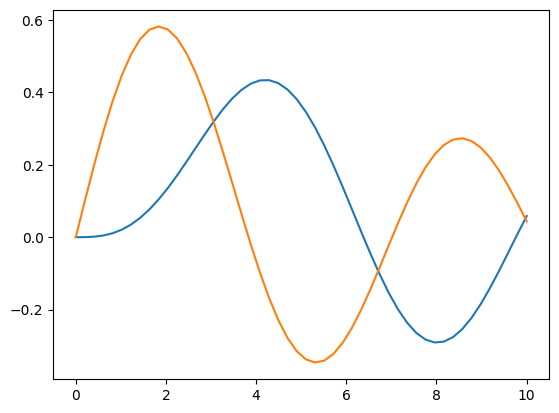

In [32]:
plt.plot(*zip(*[(x,jv(3,x)) for x in  np.linspace(0,10)]))
plt.plot(*zip(*[(x,jv(1,x)) for x in  np.linspace(0,10)]))

Matrix multiplication in a non-orthonormal basis?

 $$\bra{\nu} AB\ket{\mu} = \bra{\nu} A I B\ket{\mu}$$
 $$ =\sum_\xi \bra{\nu} A \ket{\xi}\bra{\xi} B\ket{\mu}$$
when $I = \sum_\xi \ket{\xi}\bra{\xi}$.

If
$$\bra{\xi} A \ket{\zeta} = \frac{\pi}{2}\int_0^\infty J_{\xi}(r) A J_\zeta(r) \frac{dr}{r} $$

does this behave like the identity?
$$ \Xi =  \sum_\xi 2 \xi \ket{\xi}\bra{\xi} ? $$

$$ \braket{\alpha|\beta} = \frac{1_{\alpha=\beta}}{2\alpha} $$

$$\bra{\nu} \Xi \ket{\mu} = \sum_\xi 2 \xi \braket{\nu|\xi}\braket{\xi|\mu} = \sum_\xi 2 \xi  \frac{1_{\xi=\nu}}{2\nu} \frac{1_{\xi=\mu}}{2\xi}   =  \frac{1_{\nu=\mu}}{2\nu}  $$

Or you could just define:

$$ \bra{\alpha} \hat O \ket{\beta} := 2\sqrt{\alpha\beta} \int_0^\infty J_\alpha(r) \hat O J_\beta(r) \frac{dr}{ r} $$

That way the basis is orthonormal:

$$\braket{\alpha | \beta} = \frac{2\sqrt{\alpha\beta}}{\alpha^2 - \beta^2} \frac{2}{\pi} \sin(\frac{\pi}{2}(\alpha-\beta))  = 1_{\alpha=\beta}, $$

so that:
$$ \bra{\alpha} \hat O_1 \hat O_2 \ket{\beta} = \sum_\xi \bra{\alpha} \hat O_1 \ket{\xi}\bra{\xi} \hat O_2 \ket{\beta}  $$


## Common matrices

Identities:
$$\frac{2\alpha}{r} J_\alpha = J_{\alpha-1} + J_{\alpha+1}$$
$$2 \partial_r J_\alpha = J_{\alpha-1} - J_{\alpha+1}$$

$$\bra{\alpha} \partial_r \ket{\beta} = \sqrt{\alpha\beta} \int_0^\infty J_\alpha ( J_{\beta-1} - J_{\beta+1} )\frac{dr}{r} = \sqrt{\alpha\beta} \frac{2}{\pi} \left( \frac{\sin(\frac{\pi}{2}( \alpha - \beta + 1 ))  }{\alpha^2 - (\beta-1)^2} - \frac{\sin(\frac{\pi}{2}( \alpha - \beta - 1 ))  }{\alpha^2 - (\beta+1)^2}  \right)  $$
$$= \pm \sqrt{\alpha\beta} \frac{2}{\pi} \left( \frac{1  }{\alpha^2 -  \beta^2 + 2\beta -1} + \frac{-1 }{\alpha^2 -  \beta^2 - 2\beta -1 }  \right)  $$
$$= \pm \sqrt{\alpha\beta} \frac{2}{\pi} \left( \frac{- 4\beta }{... }  \right)  $$

Does $ \partial_r^\top =  - \partial_r r$ still hold with this inner product? $\to$ Abtin
 
$$\bra{\alpha} \partial_r \ket{\beta} = 2\sqrt{\alpha\beta} \int_0^\infty J_\alpha \frac{dJ_\beta}{dr} \frac{dr}{r} = 2\sqrt{\alpha\beta} \int_0^\infty J_\alpha \frac{dJ_\beta}{r}$$



$$ d\ln(r) = dr/r ??$$

$$\int u dv = uv - \int v du $$ 


## Matrix elements $\theta$-pinch with $r$ dependence

$$\rho_0 = 1; \hspace{5mm} \gamma = 5/3;\hspace{5mm}  k_\parallel \in \mathbb{Z}$$
$$k_\perp = \frac{m}{r};\hspace{5mm} m \in \mathbb{Z}; \hspace{5mm} B_z = 1 - \beta (1-r^2)^2  $$
$$ \beta  = \frac{\beta_0}{1 + \sqrt{1-\beta_0^2}};\hspace{5mm} 0 < \beta_0 < 1 $$

$$\begin{bmatrix} \partial_r \frac{\gamma \rho_0 + B_z^2}{r} \partial_r r - k_\parallel^2 B_z^2    \end{bmatrix}$$
